# Лабораторная работа №3. Синтез БИХ-фильтров




## Модуль 1. Метод размещения нулей и полюсов.


# Вариант 2

In [1]:
import numpy as np
from scipy import signal
import scipy
import matplotlib.pyplot as plt

### Задача 1.1 Синтез цифрового резонатора

| Варианты: |   $1$ |    $2$ |    $3$ |    $4$ |    $5$ |    $6$ |     $7$ |    $8$ |    $9$ |    $10$ | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|  $\nu_0$  | $0.25$ | $0.2$ | $0.1$ |  $—$ | $—$ | $—$ | $0.3$ | $0.15$ | $0.35$ | $0.4$ |
|$\theta_0$ | $—$ | $—$ | $—$ | $\dfrac\pi6$ | $\dfrac\pi3$ | $\dfrac\pi2$ |  $—$ | $—$ | $—$ | $—$ |

Синтезировать методом размещения нулей и полюсов цифровой резонатор для частоты $\nu_0$ или $\theta_0$ (в зависимости от варианта). Параметр, влияющий на добротность резонатора, подобрать самостоятельно.

* Построить нуль-полюсную диаграмму получившегося фильтра.
* Записать передаточную функцию $H(z)$.
* Вычислить аналитически импульсную и переходную характеристики и сравнить с результатами моделирования.
* Исследовать фильтр на устойчивость по входу.
* Изобразить блок-схему фильтра.
* Построить АЧХ и ФЧХ фильтра.
* Сравнить АЧХ с $H(z)$.

$$
\theta_0 = 2 \pi \nu_0 = 0.4\pi.
$$

$$H(z)=
\dfrac{K(1-z^{-1})(1+z^{-1})}
{\left( 1-A\exp (j{{\theta }_{0}}){{z}^{-1}} \right)  \left( 1-A\exp (-j{{\theta }_{0}}){{z}^{-1}} \right)} =
\dfrac{{K}(1 - z^{-2})}{1 - 2A \cos(\theta_0) z^{-1} + A^2 z^{-2}}.
$$

Коэффициент  $K$ выберем, исходя из нормировки на резонансных частотах:
$$K =  \dfrac{|(1 - A)(1 - Ae^{-2j\theta})|}{|1 - e^{-2j\theta}|} =
\dfrac{(1 - A) \sqrt{1 + A^2 - 2A\cos(2\theta_0)}}{2|\sin(\theta_0)|}.$$


$$|H(\theta)|=
\dfrac{K(1 - e^{-2j\theta})}{\left|1 - 2A \cos(\theta_0) e^{-j\theta} + A^2 e^{-2j\theta}\right|}.
$$

<img src="img/1.png" style="height:350px">

In [4]:
nu_0 = 0.2
theta = 2 * np.pi * nu_0
A = 0.8

zeros = np.array((-1, 1))
poles = np.array((A*np.exp(1j*theta), A*np.exp(-1j*theta)))
k = (1 - A)*np.sqrt(1 + A**2 - 2*A*np.cos(2*theta))/2/abs(np.sin(theta))

res = signal.dlti(zeros, poles, k, dt=1)
thetas = np.linspace(-np.pi, +np.pi, 10000)
_, H = signal.dfreqresp(res, w=thetas)

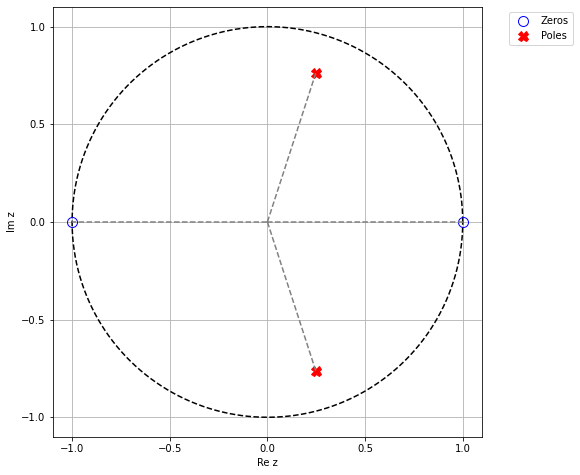

In [5]:
plt.figure(figsize=[8, 8])
t = np.linspace(0, 2*np.pi, 10000)
plt.plot(np.cos(t), np.sin(t), 'k--')  

plt.plot(zeros.real, zeros.imag, 'bo', ms = 10, fillstyle = 'none', label='Zeros')
plt.plot(poles.real, poles.imag, 'rX', ms = 10, label='Poles')

for u in zeros:
    plt.plot([0, u.real], [0, u.imag],  '--', color='gray')

for u in poles:
    plt.plot([0, u.real], [0, u.imag],  '--', color='gray')

plt.yticks(np.linspace(-1, 1, 5))
plt.xticks(np.linspace(-1, 1, 5))

plt.grid()
plt.axis('image')
plt.axis([-1.1, 1.1, -1.1, 1.1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, numpoints=1)

plt.xlabel("Re z")
plt.ylabel("Im z")

plt.tight_layout()

Оба полюса внутри круга - фильтр устойчив по входу.

Импульсная характеристика
$$
h[k] = \dfrac{1}{2\pi j} \oint \limits_{\gamma} H(z)z^{k-1}dz =
\dfrac{1}{2\pi j} \oint \limits_{\gamma} \dfrac{K(z+1)(z-1)z^{k-1}}{\left( z-Ae^{j{\theta}_{0}} \right)  \left( z-Ae^{-j{\theta }_{0}} \right)}dz =
\sum \limits_{p} \underset{z_p}{\text{res}} \left\{ \dfrac{K(z+1)(z-1)z^{k-1}}{\left( z-Ae^{j{\theta}_{0}} \right)  \left( z-Ae^{-j{\theta }_{0}} \right)} \right\}.
$$
Полюсы: $z_p = 0, Ae^{j\theta_0}, Ae^{-j\theta_0}$
\begin{align*}
\underset{z_p = 0}{\text{res}} &\left\{\dfrac{K(z-1)(z+1)}{(z - Ae^{j\theta_0})(z - Ae^{-j\theta_0})}z^{k-1}\right\} = -\dfrac{K}{A^2}.\\
\underset{z_p =Ae^{j\theta_0}}{\text{res}} &\left\{\dfrac{K(z-1)(z+1)}{(z - Ae^{j\theta_0})(z - Ae^{-j\theta_0})}z^{k-1}\right\} = 
KA^{k-2}\dfrac{(A^2e^{2j\theta_0}-1)e^{j(k-1)\theta_0}}{(e^{j\theta_0} - e^{-j\theta_0})}.\\
\underset{z_p =Ae^{-j\theta_0}}{\text{res}} &\left\{\dfrac{K(z-1)(z+1)}{(z - Ae^{j\theta_0})(z - Ae^{-j\theta_0})}z^{k-1}\right\} =  
-KA^{k-2}\dfrac{(A^2e^{-2j\theta_0}-1)e^{-j(k-1)\theta_0}}{(e^{j\theta_0} - e^{-j\theta_0})}.
\end{align*}

\begin{equation*}
h[k] = KA^{k-2}\cdot\dfrac{A^2\sin(k+1)\theta_0 - \sin(k-1)\theta_0}{\sin\theta_0}u[k] -\dfrac{K}{A^2}\delta[k].
\end{equation*}

$$
G(z) = H(z)U(z) = 
\dfrac{K(z-1)(z+1)}{\left( z-Ae^{j{\theta}_{0}} \right)  \left( z-Ae^{-j{\theta }_{0}} \right)}\dfrac{z}{z-1} =
\dfrac{K(z+1)z}{\left( z-Ae^{j{\theta}_{0}} \right)  \left( z-Ae^{-j{\theta }_{0}} \right)}.
$$


$$
g[k] = \dfrac{1}{2\pi j} \oint \limits_{\gamma} G(z)z^{k-1}dz =
\dfrac{1}{2\pi j} \oint \limits_{\gamma} \dfrac{K(z+1)z^k}{\left( z-Ae^{j{\theta}_{0}} \right)  \left( z-Ae^{-j{\theta }_{0}} \right)}dz =
\sum \limits_{p} \underset{z_p}{\text{res}} \left\{ \dfrac{K(z+1)z^k}{\left( z-Ae^{j{\theta}_{0}} \right)  \left( z-Ae^{-j{\theta }_{0}} \right)} \right\}
$$

Полюсы: $z_p = Ae^{j{\theta}_{0}}, Ae^{-j{\theta}_{0}}$

\begin{align*}
\underset{z_p =Ae^{j\theta_0}}{\text{res}} &\left\{  \dfrac{K(z+1)z^k}{\left( z-Ae^{j{\theta}_{0}} \right)  \left( z-Ae^{-j{\theta }_{0}} \right)}  \right\} = KA^{k-1}\dfrac{(Ae^{j\theta_0}+1)e^{jk\theta_0}}{(e^{j\theta_0} - e^{-j\theta_0})}\\
\underset{z_p =Ae^{-j\theta_0}}{\text{res}} &\left\{  \dfrac{K(z+1)z^k}{\left( z-Ae^{j{\theta}_{0}} \right)  \left( z-Ae^{-j{\theta }_{0}} \right)}  \right\} = -KA^{k-1}\dfrac{(Ae^{-j\theta_0}-1)e^{-jk\theta_0}}{(e^{j\theta_0} - e^{-j\theta_0})}
\end{align*}

$$
g[k] = KA^{k-1}\cdot\dfrac{A\sin(k+1)\theta_0 + \sin k\theta_0}{\sin\theta_0}u[k].
$$

/tmp/ipykernel_17527/1176093952.py:12: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ml, sl, bl = plt.stem(t, np.squeeze(h), 'b', basefmt = 'k--', markerfmt = 'bo', label="$h[k]$", use_line_collection=True)
/tmp/ipykernel_17527/1176093952.py:27: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ml, sl, bl = plt.stem(t, np.squeeze(g), 'r', basefmt = 'k--', markerfmt = 'ro', label="$g[k]$", use_line_collection=True)


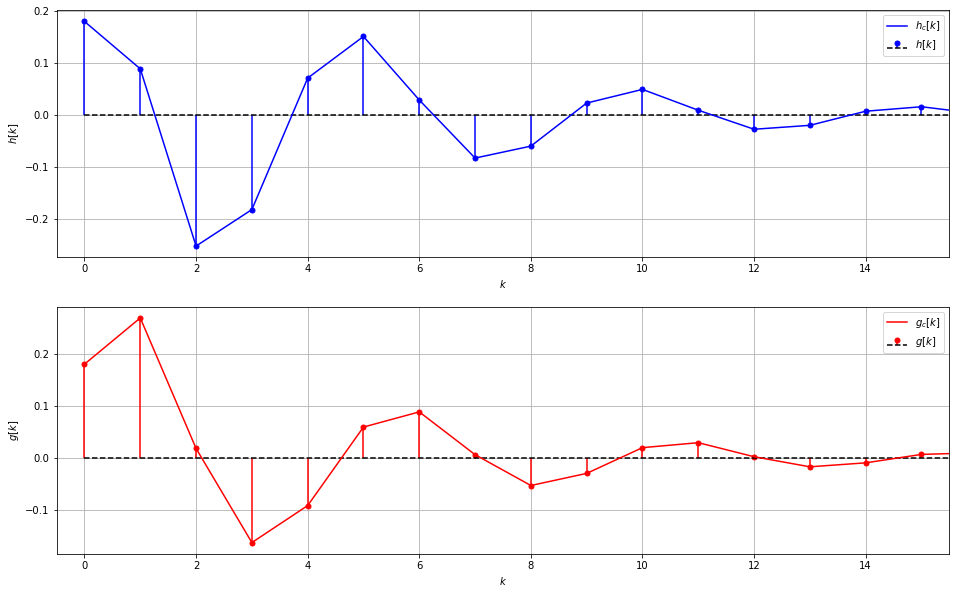

In [6]:
n = np.arange(20)
h_custom = k * A**(n-2) * (A**2 * np.sin((n+1)*theta) - np.sin((n-1)*theta))/np.sin(theta)
h_custom[0] += -k/A**2
g_custom = k * A**(n-1) * (A * np.sin((n+1)*theta) + np.sin(n*theta))/np.sin(theta)


plt.figure(figsize=(16,10))

plt.subplot(211)

t, h = signal.dimpulse(res, n=20)
ml, sl, bl = plt.stem(t, np.squeeze(h), 'b', basefmt = 'k--', markerfmt = 'bo', label="$h[k]$", use_line_collection=True)
plt.setp(ml, markersize = 5)

plt.plot(n, h_custom, 'b', label="$h_c[k]$")

plt.grid()
plt.xlim(-0.5, 15.5)
plt.xlabel("$k$")
plt.ylabel("$h[k]$")
plt.legend(loc = 'upper right')

plt.subplot(212)
t, g = signal.dstep(res, n=20)

t, h = signal.dimpulse(res, n=20)
ml, sl, bl = plt.stem(t, np.squeeze(g), 'r', basefmt = 'k--', markerfmt = 'ro', label="$g[k]$", use_line_collection=True)
plt.setp(ml, markersize = 5)

plt.plot(n, g_custom, 'r', label="$g_c[k]$")

plt.xlim(-0.5, 15.5)
plt.xlabel("$k$")
plt.ylabel("$g[k]$")
plt.legend(loc = 'upper right')
plt.grid()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


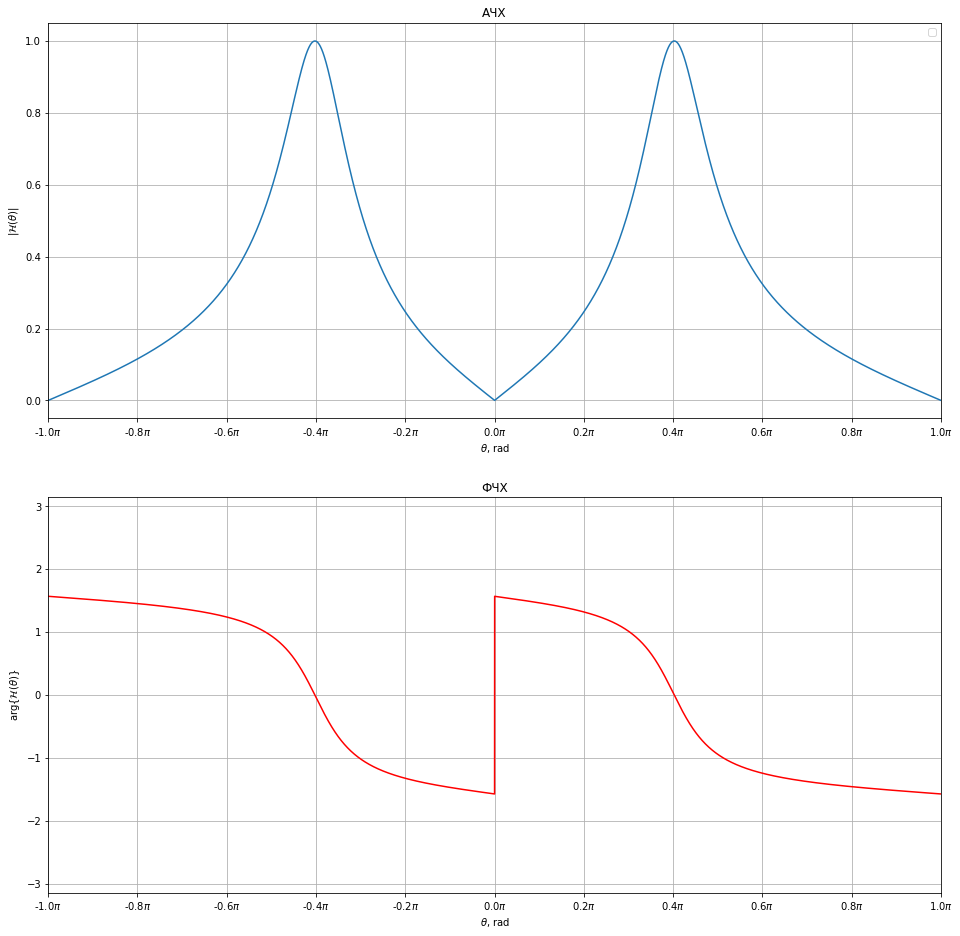

In [10]:
fig, ax = plt.subplots(figsize=(16, 16))

plt.subplot(211)
plt.plot(thetas, abs(H))
plt.xlabel("$\\theta$, rad")
plt.ylabel("$|H(\\theta)|$")
plt.title("АЧХ")
plt.xlim([-np.pi, np.pi])
ticks = np.linspace(-1. , 1., 11)
plt.xticks(ticks*np.pi, labels = ['{}$\\pi$'.format(round(tick, 1)) for tick in ticks])
plt.legend()
plt.grid()

plt.subplot(212)
plt.plot(thetas, np.angle(H), 'r')
plt.xlabel("$\\theta$, rad")
plt.ylabel("arg$\{H(\\theta)\}$")
plt.title("ФЧХ")
plt.xlim([-np.pi, np.pi])
plt.ylim([-np.pi, np.pi])
ticks = np.linspace(-1. , 1., 11)
plt.xticks(ticks*np.pi, labels = ['{}$\\pi$'.format(round(tick, 1)) for tick in ticks])
plt.grid()
plt.show()

### Задача 1.2 Синтез цифрового фильтра Hum removal

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |   10 |  
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|  $f_0$, Гц  | 250 | 350 | 400 |  200 | 100 | 150 | 250 | 500| 600 | 350 |
|  $f_д$, Гц | 1000 | 1000 | 1000 | 500 | 500 | 500 | 1000 | 2000 | 2000 | 2000 |

Синтезировать методом размещения нулей и полюсов цифровой фильтр Hum removal  для частоты $f_{0}$, $f_{д}$. Параметр, влияющий на добротность, подобрать самостоятельно.

* Записать передаточную функцию $H(z)$.
* Исследовать фильтр на устойчивость по входу.
* Изобразить блок-схему фильтра.
* Построить АЧХ и ФЧХ фильтра.
* Сравнить АЧХ с $H(z)$.


$$
\theta_0 = 2 \pi \dfrac{f_0}{f_d} = \dfrac{7}{10}\pi.
$$

$$H(z)={K}
\dfrac{\left( 1-\exp (j{{\theta }_{0}}){{z}^{-1}} \right)\left( 1-\exp (-j{{\theta }_{0}}){{z}^{-1}} \right)}
{\left( 1-A\exp (j{{\theta }_{0}}){{z}^{-1}} \right)  \left( 1-A\exp (-j{{\theta }_{0}}){{z}^{-1}} \right)} =
{K} \dfrac{1 - 2\cos(\theta_0) z^{-1} + z^{-2}}{1 - 2A \cos(\theta_0) z^{-1} + A^2 z^{-2}}.
$$

Для нормировки на нулевой частоте выберем $K =  \dfrac{1 - 2A \cos(\theta_0) + A^2}{2 - 2\cos(\theta_0)}.$

$$|H(\theta)|={K}
\Bigg| \dfrac{1 - 2\cos(\theta_0) e^{-j\theta} + z^{-2j\theta}}{1 - 2A \cos(\theta_0) e^{-j\theta} + A^2 e^{-2j\theta}} \Bigg|.
$$

<img src="img/2.png" style="height:200px">

In [3]:
f_0 = 350
f_d = 1000
theta = 2 * np.pi * f_0/f_d
A = 0.8

zeros = np.array((np.exp(1j*theta), np.exp(-1j*theta)))
poles = np.array((A*np.exp(1j*theta), A*np.exp(-1j*theta)))
k = (A**2 - 2*A*np.cos(theta) + 1) / (2 - 2*np.cos(theta))

hum = signal.dlti(zeros, poles, k, dt=1)
thetas = np.linspace(-np.pi, +np.pi, 10000)
_, H = signal.dfreqresp(hum, w=thetas)

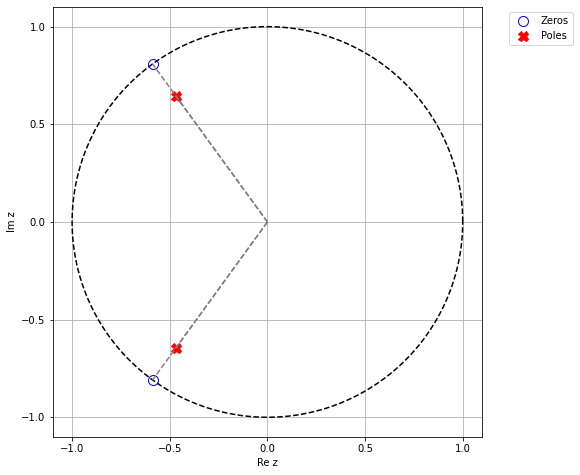

In [4]:
plt.figure(figsize=[8, 8])
t = np.linspace(0, 2*np.pi, 10000)
plt.plot(np.cos(t), np.sin(t), 'k--')  

plt.plot(zeros.real, zeros.imag, 'bo', ms = 10, fillstyle = 'none', label='Zeros')
plt.plot(poles.real, poles.imag, 'rX', ms = 10, label='Poles')

for u in zeros:
    plt.plot([0, u.real], [0, u.imag],  '--', color='gray')

for u in poles:
    plt.plot([0, u.real], [0, u.imag],  '--', color='gray')

plt.yticks(np.linspace(-1, 1, 5))
plt.xticks(np.linspace(-1, 1, 5))

plt.grid()
plt.axis('image')
plt.axis([-1.1, 1.1, -1.1, 1.1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, numpoints=1)


plt.xlabel("Re z")
plt.ylabel("Im z")

plt.tight_layout()

Оба полюса внутри круга, значит фильтр устойчивый по входу.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


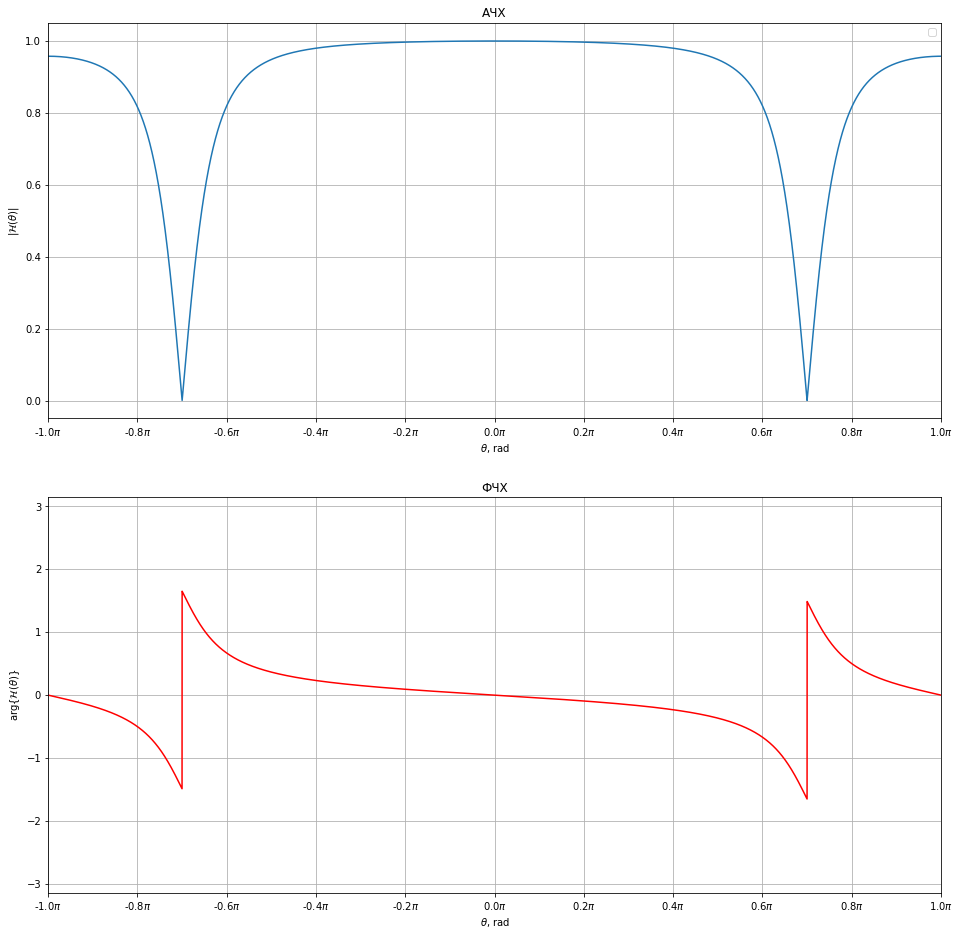

In [7]:
fig, ax = plt.subplots(figsize=(16, 16))

plt.subplot(211)
plt.plot(thetas, abs(H))
plt.xlabel("$\\theta$, rad")
plt.ylabel("$|H(\\theta)|$")
plt.title("АЧХ")
plt.xlim([-np.pi, np.pi])
ticks = np.linspace(-1. , 1., 11)
plt.xticks(ticks*np.pi, labels = ['{}$\\pi$'.format(round(tick, 1)) for tick in ticks])
plt.legend()
plt.grid()

plt.subplot(212)
plt.plot(thetas, np.angle(H), 'r')
plt.xlabel("$\\theta$, rad")
plt.ylabel("arg$\{H(\\theta)\}$")
plt.title("ФЧХ")
plt.xlim([-np.pi, np.pi])
plt.ylim([-np.pi, np.pi])
ticks = np.linspace(-1. , 1., 11)
plt.xticks(ticks*np.pi, labels = ['{}$\\pi$'.format(round(tick, 1)) for tick in ticks])
plt.grid()
plt.show()

## Модуль 2. Метод билинейного *z*-преобразования

### Задача 2.1 Синтез фильтра нижних частот (ФНЧ)

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|  $f_д$, Гц  | 6000 | 6200 | 6400 |  6600 | 6800 | 7000 | 6200 | 6400 |  6600 | 6800 |
|  $f_1$, Гц | 800 | 860 | 920 | 980 | 1040 | 1100 | 860 | 920 | 980 | 1040 |
|  $f_2$, Гц | 1100 | 1170 | 1240 | 1310 | 1380 | 1450 |1170 | 1240 | 1310 | 1380 |
|  $a_{max}$, дБ | 0.4455 | 0.4455 | 0.4455 | 0.4455 | 0.4455 | 0.4455 |0.4455 | 0.4455 | 0.4455 | 0.4455 |
|  $a_{min}$, дБ | 40 | 40 | 40 | 40 | 40 | 40 |40 | 40 | 40 | 40 |

 Получить коэффициенты разностного уравнения БИХ-фильтра нижних частот со следующими характеристиками:
* частота дискретизации $f_{д}$, 
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимальное допустимое затухание в полосе пропускания $a_{max}$,
* минимальное допустимое затухание в полосе задерживания $a_{min}$.

Воспользоваться методом билинейного z-преобразования для фильтров: 

1) Баттервота,

2) Чебышёва 1 рода,

3) Чебышёва 2 рода,

4) Золотарёва—Кауэра.

Из четырех получившихся результатов выбрать фильтр, обладающий наименьшим порядком $N$ и построить схему его реализации в виде каскада биквадратных блоков. Для биквадратных блоков выбрать прямую каноническую реализацию. 


In [8]:
fs = 6200
f1 = 860
f2 = 1170
a_max = 0.4455
a_min = 40

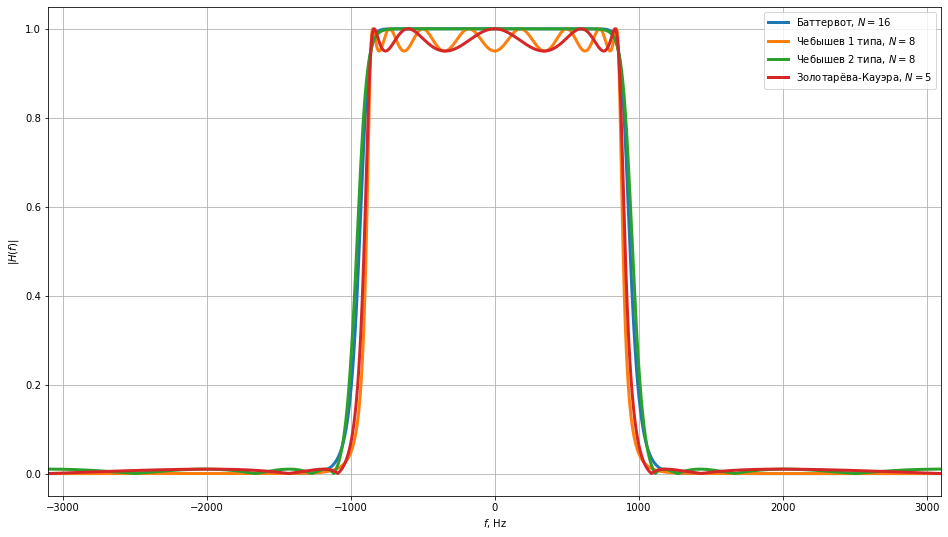

In [11]:
fig, ax = plt.subplots(figsize=(16, 9))

N, Wn = signal.buttord(wp=f1, ws=f2, gpass=a_max, gstop=a_min, analog=False, fs=fs)
beta, alpha = signal.butter(N, Wn=Wn, btype='lowpass', analog=False, output='ba', fs=fs)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 10000), fs=fs)
plt.plot(f, abs(H), lw = 3, label = 'Баттервот, $N = %d$'%N)

N, Wn = signal.cheb1ord(wp=f1, ws=f2, gpass=a_max, gstop=a_min, analog=False, fs=fs)
beta, alpha = signal.cheby1(N, Wn=Wn, rp=a_max, btype='lowpass', analog=False, output='ba', fs=fs)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 10000), fs=fs)
plt.plot(f, abs(H), lw = 3, label = 'Чебышев 1 типа, $N = %d$'%N)

N, Wn = signal.cheb2ord(wp=f1, ws=f2, gpass=a_max, gstop=a_min, analog=False, fs=fs)
beta, alpha = signal.cheby2(N, Wn=Wn, rs=a_min, btype='lowpass', analog=False, output='ba', fs=fs)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 10000), fs=fs)
plt.plot(f, abs(H), lw = 3, label = 'Чебышев 2 типа, $N = %d$'%N)

N, Wn = signal.ellipord(wp=f1, ws=f2, gpass=a_max, gstop=a_min, analog=False, fs=fs)
beta, alpha = signal.ellip(N, Wn=Wn, rp=a_max, rs=a_min, btype='lowpass', analog=False, output='ba', fs=fs)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 10000), fs=fs)
plt.plot(f, abs(H), lw = 3, label = 'Золотарёва-Кауэра, $N = %d$'%N)

plt.xlim([-fs/2, fs/2])
plt.xlabel("$f$, Hz")
plt.ylabel("$|H(f)|$")

plt.grid()
plt.legend(loc='upper right')
plt.show()

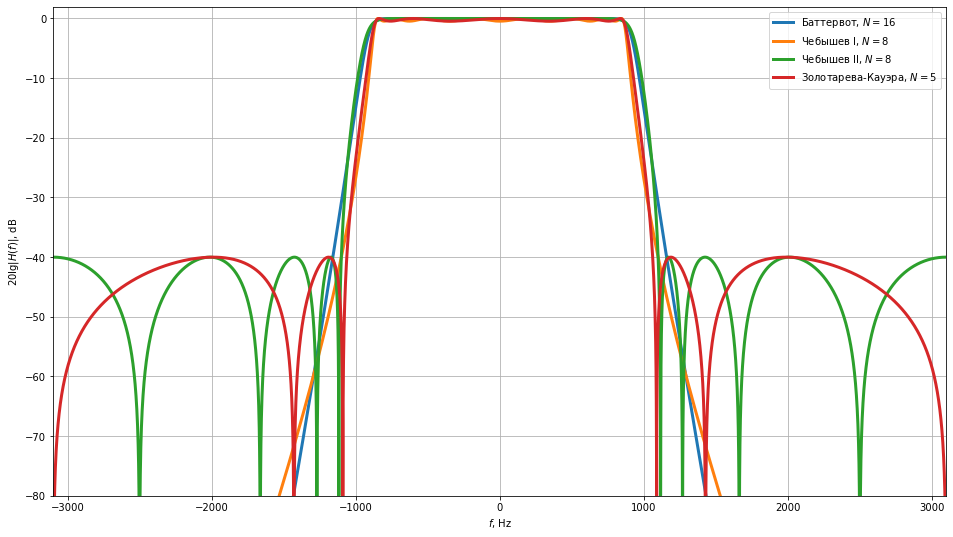

In [12]:
fig, ax = plt.subplots(figsize=(16, 9))

N, Wn = signal.buttord(wp=f1, ws=f2, gpass=a_max, gstop=a_min, analog=False, fs=fs)
beta, alpha = signal.butter(N, Wn=Wn, btype='lowpass', analog=False, output='ba', fs=fs)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 10000), fs=fs)
plt.plot(f, 20*np.log10(abs(H)), lw = 3, label = 'Баттервот, $N = %d$'%N)

N, Wn = signal.cheb1ord(wp=f1, ws=f2, gpass=a_max, gstop=a_min, analog=False, fs=fs)
beta, alpha = signal.cheby1(N, Wn=Wn, rp=a_max, btype='lowpass', analog=False, output='ba', fs=fs)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 10000), fs=fs)
plt.plot(f, 20*np.log10(abs(H)), lw = 3, label = 'Чебышев I, $N = %d$'%N)

N, Wn = signal.cheb2ord(wp=f1, ws=f2, gpass=a_max, gstop=a_min, analog=False, fs=fs)
beta, alpha = signal.cheby2(N, Wn=Wn, rs=a_min, btype='lowpass', analog=False, output='ba', fs=fs)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 10000), fs=fs)
plt.plot(f, 20*np.log10(abs(H)), lw = 3, label = 'Чебышев II, $N = %d$'%N)

N, Wn = signal.ellipord(wp=f1, ws=f2, gpass=a_max, gstop=a_min, analog=False, fs=fs)
beta, alpha = signal.ellip(N, Wn=Wn, rp=a_max, rs=a_min, btype='lowpass', analog=False, output='ba', fs=fs)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 10000), fs=fs)
plt.plot(f, 20*np.log10(abs(H)), lw = 3, label = 'Золотарева-Кауэра, $N = %d$'%N)

plt.xlim([-fs/2, fs/2])
plt.xlabel("$f$, Hz")
plt.ylabel("$20 \lg |H(f)|$, dB")

plt.ylim(-80, 2)
plt.grid()
plt.legend(loc='upper right')
plt.show()

In [13]:
N, Wn = signal.ellipord(wp=f1, ws=f2, gpass=a_max, gstop=a_min, analog=False, fs=fs)
beta, alpha = signal.ellip(N, Wn=Wn, rp=a_max, rs=a_min, btype='lowpass', analog=False, output='ba', fs=fs)
print(signal.tf2sos(beta, alpha))

[[ 0.02650714  0.02650714  0.          1.         -0.6320749   0.        ]
 [ 1.         -0.24419405  1.          1.         -1.22263607  0.62217699]
 [ 1.         -0.89986021  1.          1.         -1.20384609  0.90046718]]


<img src="img/3.png" style="height:350px">

### Задача 2.2 Синтез аналога двухкаскадного RC-фильтра (I способ)

Построить БИХ фильтр, эквивалентный двум последовательно соединенным RC-цепочкам интегрирующего типа (соединённым через развязывающий усилитель), воспользовавшись методом билинейного *z*-преобразования.

Параметры $RC$ и $\Delta t $ выбрать самостоятельно. 
Сравнить частотные и импульсные характеристики  цифровых фильтров и их аналоговых прототипов. 

Уравнение интегрирующей RC-цепочки: $RC \dfrac{dy}{dt} + y(t) = x(t)$, $y(0) = 0$.
Применяем преобразование Лапласа: $RC p Y(p) + Y(p) = X(p)$.


Передаточная функции одной RC-цепочки и каскада из двух RC-цепочек соответственно:
\begin{equation*}
H_1(p) = \dfrac{Y(p)}{X(p)} = \dfrac{1}{1 + RCp},\quad
H_2(p) = \big(H_1(p)\big)^2 = \dfrac{1}{\left(1 + RCp\right)^2} = \dfrac{1}{1 + 2RCp + (RCp)^2}.
\end{equation*}

Передаточную функцию $H(z)$ для цифрового фильтра получим методом билинейного Z-преобразования заменой $p = \dfrac{2}{\Delta t}\dfrac{1-z^{-1}}{1+z^{-1}}:$
$$
H(z)=\frac{1}{(RC)^{2}\left(\dfrac{2}{\Delta t} \dfrac{1-z^{-1}}{1+z^{-1}}\right)^{2}+2 RC\left(\dfrac{2}{\Delta t} \dfrac{1-z^{-1}}{1+z^{-1}}\right)+1} = 
\dfrac{1+2 z^{-1}+z^{-2}}{\left(2\left(\frac{RC}{\Delta t}\right)+1\right)^2+\left(2-8 \left(\frac{RC}{\Delta t}\right)^{2}\right) z^{-1}+\left(2\left(\frac{RC}{\Delta t}\right)-1\right)^2 z^{-2}}.
$$

<img src="img/4.png" style="height:300px">

In [14]:
RC = 2*1e-3
dt = RC/10

LTI = signal.lti(
    [1],
    [RC**2, 2*RC, 1]
)

DLTI = signal.dlti(
    [1, 2, 1],
    [(2*RC/dt + 1)**2, (2 - 8*(RC/dt)**2), (2*RC/dt - 1)**2],
    dt=dt
)

/tmp/ipykernel_19014/3218184710.py:8: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ml, sl, bl = plt.stem(t, np.squeeze(h), 'b', basefmt = 'k--', markerfmt = 'bo', label="$h[k]$", use_line_collection=True)


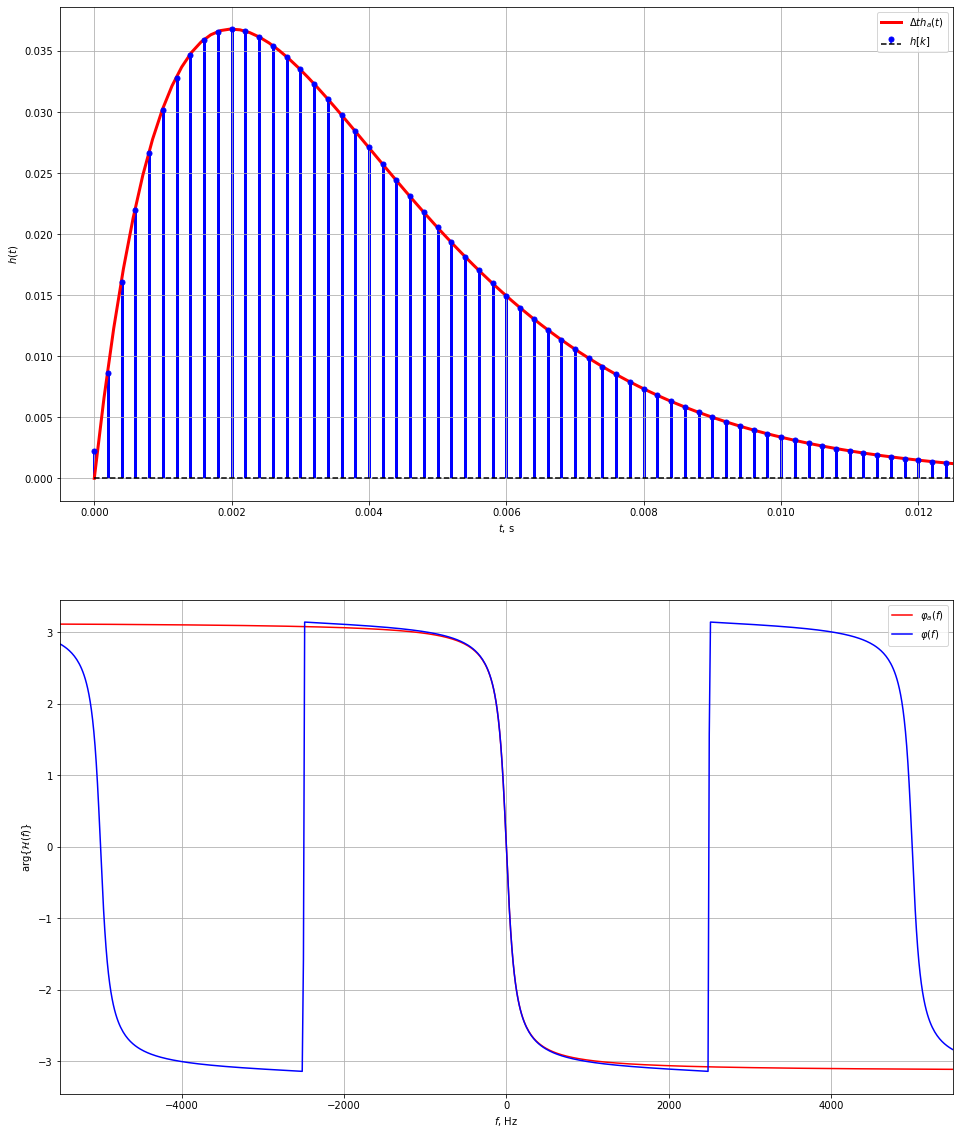

In [19]:
plt.figure(figsize=(16,20))

plt.subplot(211)
t, h_a = signal.impulse(LTI)
plt.plot(t, h_a*dt, 'r', lw=3, label="$\\Delta t h_a(t)$")

t, h = signal.dimpulse(DLTI, n=100)
ml, sl, bl = plt.stem(t, np.squeeze(h), 'b', basefmt = 'k--', markerfmt = 'bo', label="$h[k]$", use_line_collection=True)
plt.setp(sl, lw=3, zorder = 1)
plt.setp(ml, markersize = 5)

plt.grid()
plt.xlim([-0.0005, 0.0125])
plt.xlabel("$t$, s")
plt.ylabel("$h(t)$")
plt.legend(loc = 'upper right')

plt.subplot(212)

w_a, H_a = signal.freqresp(LTI, w=np.linspace(-3*np.pi, 3*np.pi, 1000)/dt)
theta_d, H_d = signal.dfreqresp(DLTI, w=np.linspace(-3*np.pi, 3*np.pi, 1000))

plt.plot(w_a/(2*np.pi), np.angle(H_a), "r", label="$\\varphi_a(f)$")
plt.plot(theta_d/(2*np.pi*dt), np.angle(H_d), "b", label="$\\varphi(f)$")
plt.ylabel("arg$\{\mathcal{H}(f)\}$")
plt.xlabel("$f$, Hz")
plt.xlim(-1.1/dt, +1.1/dt)
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

## Модуль 3. Метод инвариантной импульсной характеристики.

### Задача 3.1 Синтез аналога двухкаскадного RC-фильтра (II способ)

Построить БИХ фильтр, эквивалентный двум последовательно соединенным RC-цепочкам интегрирующего типа (соединённым через развязывающий усилитель), воспользовавшись методом инвариантной импульсной характеристики.

Параметры $RC$ и $\Delta t $ выбрать самостоятельно. 
Сравнить частотные и импульсные характеристики  цифровых фильтров и их аналоговых прототипов. 

Уравнение интегрирующей RC-цепочки: $RC \dfrac{dy}{dt} + y(t) = x(t)$, $y(0) = 0$.
Применяем преобразование Лапласа: $RC p Y(p) + Y(p) = X(p)$.


Передаточная функции одной RC-цепочки и каскада из двух RC-цепочек соответственно:
\begin{equation*}
H_1(p) = \dfrac{Y(p)}{X(p)} = \dfrac{1}{1 + RCp},\quad
H_2(p) = \big(H_1(p)\big)^2 = \dfrac{1}{\left(1 + RCp\right)^2} = \dfrac{1}{1 + 2RCp + (RCp)^2}.
\end{equation*}

Вычислим обратное преобразование Лапласа:
\begin{align*}
h_a(t) &= \dfrac{1}{2 \pi j} \oint \limits_{\gamma} \mathcal{H}_2(p) e^{pt} dp = 
\dfrac{1}{2 \pi j} \oint \limits_{\gamma} \dfrac{e^{pt} dp}{\left(1 + RCp\right)^2} = 
\dfrac{1}{(RC)^2} \lim \limits_{p \to -1/RC} \left\{\dfrac{de^{pt}}{dp}\right\} =
\dfrac{t}{(RC)^2} \exp\left(-\dfrac{t}{RC}\right).
\end{align*}

Получим импульсную характеристику цифрового фильтра:
\begin{align*}
h[k] &= \Delta t \cdot h_a(k \Delta t) = \dfrac{k (\Delta t)^2}{(RC)^2} \exp\left(-\dfrac{k \Delta t}{RC}\right).
\end{align*}

Наконец, передаточная функция искомого цифрового фильтра:
\begin{align*}
\mathcal{H}(z) &= \sum \limits_{k=0}^{+\infty}h[k]z^{-k} = \sum \limits_{k=0}^{+\infty} \dfrac{k (\Delta t)^2}{(RC)^2} \exp\left(-\dfrac{k \Delta t}{RC}\right) z^{-k} = 
\dfrac{\left(\dfrac{\Delta t}{RC}\right)^2 \exp\left(-\dfrac{\Delta t}{RC}\right) z^{-1}}{1 - 2\exp\left(-\dfrac{\Delta t}{RC}\right) z^{-1} + \exp\left(-\dfrac{2\Delta t}{RC}\right) z^{-2}}
, \quad \Big|\exp\left(-\dfrac{\Delta t}{RC}\right) z^{-1}\Big| < 1.
\end{align*}

<img src="img/5.png" style="height:300px">

In [20]:
RC = 2*1e-3
dt = RC/10

LTI = signal.lti(
    [1],
    [RC**2, 2*RC, 1]
)

DLTI = signal.dlti(
    [0, (dt/RC)**2 * np.exp(-dt/RC), 0],
    [1, -2*np.exp(-dt/RC), np.exp(-2*dt/RC)],
    dt=dt
)

/home/dimanteo/.local/lib/python3.10/site-packages/scipy/signal/_filter_design.py:1746: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


/tmp/ipykernel_19014/2992268021.py:8: MatplotlibDeprecationWarning: Passing the linefmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  ml, sl, bl = plt.stem(t, np.squeeze(h), 'b', basefmt = 'k--', markerfmt = 'bo', label="$h[k]$", use_line_collection=True)


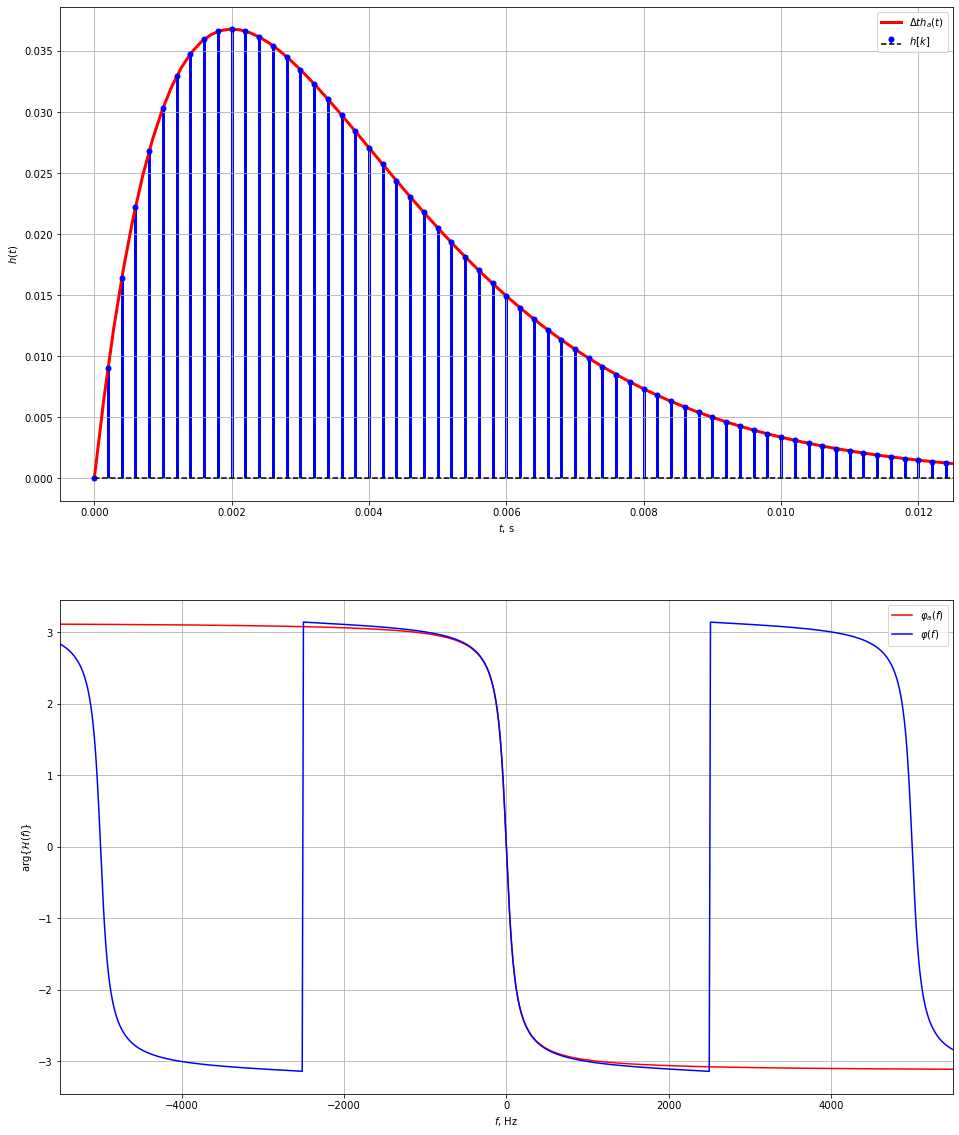

In [21]:
plt.figure(figsize=(16,20))

plt.subplot(211)
t, h_a = signal.impulse(LTI)
plt.plot(t, h_a*dt, 'r', lw=3, label="$\\Delta t h_a(t)$")

t, h = signal.dimpulse(DLTI, n=100)
ml, sl, bl = plt.stem(t, np.squeeze(h), 'b', basefmt = 'k--', markerfmt = 'bo', label="$h[k]$", use_line_collection=True)
plt.setp(sl, lw=3, zorder = 1)
plt.setp(ml, markersize = 5)

plt.grid()
plt.xlim([-0.0005, 0.0125])
plt.xlabel("$t$, s")
plt.ylabel("$h(t)$")
plt.legend(loc = 'upper right')

w_a, H_a = signal.freqresp(LTI, w=np.linspace(-3*np.pi, 3*np.pi, 1000)/dt)
theta_d, H_d = signal.dfreqresp(DLTI, w=np.linspace(-3*np.pi, 3*np.pi, 1000))

plt.subplot(212)

plt.plot(w_a/(2*np.pi), np.angle(H_a), "r", label="$\\varphi_a(f)$")
plt.plot(theta_d/(2*np.pi*dt), np.angle(H_d), "b", label="$\\varphi(f)$")
plt.ylabel("arg$\{\mathcal{H}(f)\}$")
plt.xlabel("$f$, Hz")
plt.xlim(-1.1/dt, +1.1/dt)
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

### Задача 3.2 Цифровая фильтрация реальных сигналов (творческая задача)

Выполнить фильтрацию `.wav` файла с помощью одного из цифровых фильтров, рассмотренных в первой и второй лабораторной работах. Проиллюстрировать, как в результате фильтрации изменился сигнал. Привести пример, для чего выбранный фильтр может быть применен. 

Для этой задачи `.wav` файл можно загрузить, например, с сайта [freesound.org](https://freesound.org/) или взять из предыдущих лабораторных работ.

In [2]:
import scipy.io.wavfile as wav

264600
(264600,)


/tmp/ipykernel_3496/2036390911.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, x = wav.read('chordA.wav')


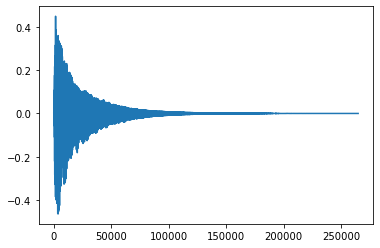

In [82]:
fs, x = wav.read('chordA.wav')
print(len(x))
x = x[:, 0]
print(x.shape)
plt.plot(np.arange(len(x)), x)
# x = x[90000:490000]
# plt.plot(np.arange(len(x)), x)

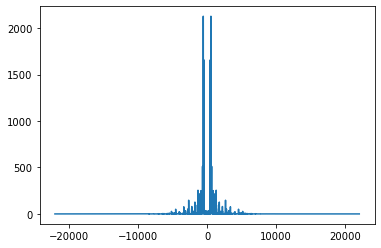

In [83]:
dvpf = np.fft.fftshift(np.fft.fft(x))

plt.plot(np.linspace(-0.5 * fs, 0.5 * fs, len(dvpf)), np.abs(dvpf))

Воспользуемся фильтром Эхо
$$
H^{echo}(z) = \dfrac{z^{-N}}{1 - 0.6 * z^{-N}}.
$$

In [92]:
N = 10000
num = np.zeros(N + 1)
num[N] = 1
denom = np.zeros(N + 1)
denom[0] = 1
denom[N] = -0.6


In [93]:

sig = np.hstack([x, np.zeros(len(x))])
filt = signal.lfilter(b=num, a=denom, x=sig)

In [94]:
scipy.io.wavfile.write(filename='output.wav', rate=fs, data=np.array(filt))